In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
%%time
#read data from xls
df = pd.read_excel('PERM_FY2020_Q3.xlsx')

Wall time: 2min 20s


In [88]:
%%time
#read data from csv
#df = pd.read_csv('PERM_FY2020_Q3.csv', encoding= 'unicode')
#a.encode('utf-8').strip()

Wall time: 0 ns


In [39]:
df.head(n=10)

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_ALT_OCC_EXP,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_INFO_DECL_TITLE
0,A-09245-62715,Denied,2009-09-03,2020-04-30 14:50:29,N,NaT,NaN,N,SATURN ENTERPRISES INC,2340 N WASHTENAW AVE,...,NaN,N,N,N,N,Christopher E Kurczaba,Attorney,kurczabalaw@sbcglobal.net,Zygmunt Oparowski,President
1,A-10119-96737,Certified-Expired,2010-03-29,2019-10-18 11:34:37,Y,2000-09-15,MARYLAND,N,FIL PARONG,13528 JAMIESON PL,...,NaN,N,N,N,N,WINSTON W TSAI,ATTORNEY AT LAW,WINSTONTSAI@AOL.COM,FIL PARONG,HEAD OF HOUSEHOLD
2,A-10225-13679,Denied,2010-08-10,2020-04-30 07:55:08,N,NaT,NaN,N,GLENNS PLUMBING SERVICES,854 CUSTER STREET,...,N,N,N,N,N,DANIEL J SULLIVAN,ATTORNEY,GWG8@AOL.COM,DAVID GLENN,OWNER
3,A-11033-51540,Certified,2011-02-03,2020-05-28 08:38:56,N,NaT,NaN,N,SKILLNET SOLUTIONS INC.,1901 SOUTH BASCOM AVENUE,...,Y,N,N,Y,N,Sonal Kinger,Attorney at Law,sonal.kinger@bakerlawcorp.com,Jack Grover,VP of Finance and Operations
4,A-11074-62984,Denied,2011-03-10,2020-06-17 07:50:52,N,NaT,NaN,N,"R L CONSTRUCTION, INC.",904 NEPPERHAN AVENUE,...,NaN,N,N,N,N,DENISE S DUTTON,NONATTORNEY,NaN,RITA O SULLIVAN,MANAGER
5,A-11138-79166,Denied,2011-05-19,2020-06-25 09:10:50,N,NaT,NaN,N,SHIRE HUMAN GENETIC THERAPIES SHGT INC,300 SHIRE WAY,...,Y,N,N,Y,N,JILL SOUBEL,ATTORNEY,JSOUBEL@RUDNICKSPECTOR.COM,BRETT JEFFRIES,Global Mobility Manager
6,A-11158-83757,Certified-Expired,2019-08-15,2019-11-05 09:27:01,N,NaT,NaN,N,"OMRON AUTOMOTIVE ELECTRONICS, INC.",3709 OHIO AVENUE,...,Y,N,N,Y,N,FAZILA VAID,ATTORNEY,fvaid@masudafunai.com,Jennifer Dobbs,Human Resources Administrator
7,A-11187-90575,Certified-Expired,2011-08-31,2019-11-01 19:31:47,N,NaT,NaN,N,ITECH US INC.,20 KIMBALL AVENUE,...,Y,N,N,Y,N,Andrea M Wisner,General Counsel,andrea@itechus.com,Kate A Keough,Director of Operations
8,A-11199-93335,Denied,2011-07-13,2020-06-01 09:09:07,N,NaT,NaN,N,"TRAMONTO, INC., DBA TRAMONTO RESTAURANT",27 SAW MILL RIVER ROAD,...,Y,N,N,Y,N,"JOSEPH A SENA, JR., ESQ.",ATTORNEYATLAW,NYPERMS@JOSEPHSENALAW.COM,MICHAELA SANTUCCI,PRESIDENT
9,A-11227-99719,Certified-Expired,2011-08-23,2019-11-01 19:29:22,N,NaT,NaN,N,THE CHOATE ROSEMARY HALL FOUNDATION INCORPORATED,333 CHRISTIAN STREET,...,NaN,N,N,Y,N,Joan M Rowe,Attorney,jrowe@wiggin.com,Stephen C Farrell,Dean of Faculty


In [38]:
df.info(verbose=1,null_counts=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71942 entries, 0 to 71941
Data columns (total 154 columns):
CASE_NUMBER                         71942 non-null object
CASE_STATUS                         71942 non-null object
RECEIVED_DATE                       71937 non-null datetime64[ns]
DECISION_DATE                       71942 non-null datetime64[ns]
REFILE                              71942 non-null object
ORIG_FILE_DATE                      76 non-null datetime64[ns]
PREVIOUS_SWA_CASE_NUMBER_STATE      79 non-null object
SCHD_A_SHEEPHERDER                  71939 non-null object
EMPLOYER_NAME                       71942 non-null object
EMPLOYER_ADDRESS_1                  71940 non-null object
EMPLOYER_ADDRESS_2                  23988 non-null object
EMPLOYER_CITY                       71942 non-null object
EMPLOYER_STATE_PROVINCE             71941 non-null object
EMPLOYER_COUNTRY                    71925 non-null object
EMPLOYER_POSTAL_CODE                71939 non-null object
EM

In [15]:
def column_info(df, column):
    print("Total Values:",len(df[column]))
    print("Total Non-NaaN Values:",df[column].count())
    print("Total NaaN Values:",(len(df[column]) - df[column].count()))
    print("% NaaN Values",(len(df[column]) - df[column].count())/df[column].count())
    print(df[column].value_counts())
    print(df[column].value_counts()/df[column].count())


In [76]:
column_info(df,'CASE_STATUS')

Total Values: 71942
Total Non-NaaN Values: 71942
Total NaaN Values: 0
% NaaN Values 0.0
Certified            49908
Certified-Expired    16327
Denied                2882
Withdrawn             2825
Name: CASE_STATUS, dtype: int64
Certified            0.693726
Certified-Expired    0.226947
Denied               0.040060
Withdrawn            0.039268
Name: CASE_STATUS, dtype: float64


In [60]:
column_info(df,'PW_WAGE')

Total Values: 71942
Total Non-NaaN Values: 71934
Total NaaN Values: 8
% NaaN Values 0.00011121305641282287
132184.00    763
101837.00    755
119101.00    662
96595.00     554
83366.00     481
108784.00    477
88171.00     474
96366.00     448
75130.00     421
113318.00    420
121222.00    417
122408.00    380
117021.00    376
117624.00    356
123552.00    336
96658.00     335
109242.00    326
119122.00    316
117770.00    306
31387.00     291
91874.00     270
111655.00    269
137426.00    266
208000.00    263
134930.00    251
138861.00    247
113381.00    243
131726.00    243
93538.00     241
106579.00    232
            ... 
30250.00       1
71855.00       1
104624.00      1
35930.00       1
143730.00      1
132454.00      1
94516.00       1
143742.00      1
95305.00       1
35.49          1
111133.00      1
143770.00      1
99472.00       1
120994.00      1
87352.00       1
176446.00      1
104603.00      1
143669.00      1
143666.00      1
147124.00      1
60490.00       1
120977.00

In [63]:
df1 = df[df['FOREIGN_WORKER_EDUCATION'].notna()]

df1['PW_WAGE'].describe()

count    7.192900e+04
mean     8.892381e+04
std      6.295865e+04
min      7.160000e+00
25%      6.391800e+04
50%      9.243500e+04
75%      1.137760e+05
max      1.338060e+07
Name: PW_WAGE, dtype: float64

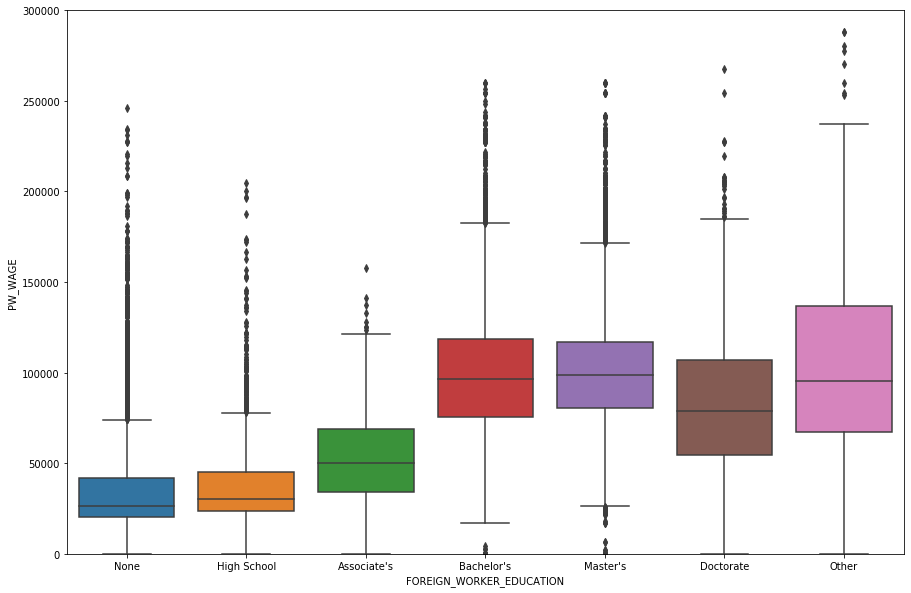

In [72]:
#Create order for plotting
k = ['None','High School',"Associate's","Bachelor's","Master's",'Doctorate','Other']

plt.figure(figsize = (15,10))
sns.boxplot(x = "FOREIGN_WORKER_EDUCATION", 
            y = "PW_WAGE", data = df1, order = k)

plt.ylim(0, 300000)
plt.show()

#df1['FOREIGN_WORKER_EDUCATION'].head()
#df1.info(verbose=1)

In [27]:
column_info(df,'PW_WAGE')

Total Values: 71942
Total Non-NaaN Values: 71934
Total NaaN Values: 8
% NaaN Values 0.00011121305641282287
132184.00    763
101837.00    755
119101.00    662
96595.00     554
83366.00     481
108784.00    477
88171.00     474
96366.00     448
75130.00     421
113318.00    420
121222.00    417
122408.00    380
117021.00    376
117624.00    356
123552.00    336
96658.00     335
109242.00    326
119122.00    316
117770.00    306
31387.00     291
91874.00     270
111655.00    269
137426.00    266
208000.00    263
134930.00    251
138861.00    247
113381.00    243
131726.00    243
93538.00     241
106579.00    232
            ... 
30250.00       1
71855.00       1
104624.00      1
35930.00       1
143730.00      1
132454.00      1
94516.00       1
143742.00      1
95305.00       1
35.49          1
111133.00      1
143770.00      1
99472.00       1
120994.00      1
87352.00       1
176446.00      1
104603.00      1
143669.00      1
143666.00      1
147124.00      1
60490.00       1
120977.00

In [25]:
df['PW_WAGE'].describe()

count    7.193400e+04
mean     8.892187e+04
std      6.296018e+04
min      7.160000e+00
25%      6.390390e+04
50%      9.243500e+04
75%      1.137760e+05
max      1.338060e+07
Name: PW_WAGE, dtype: float64

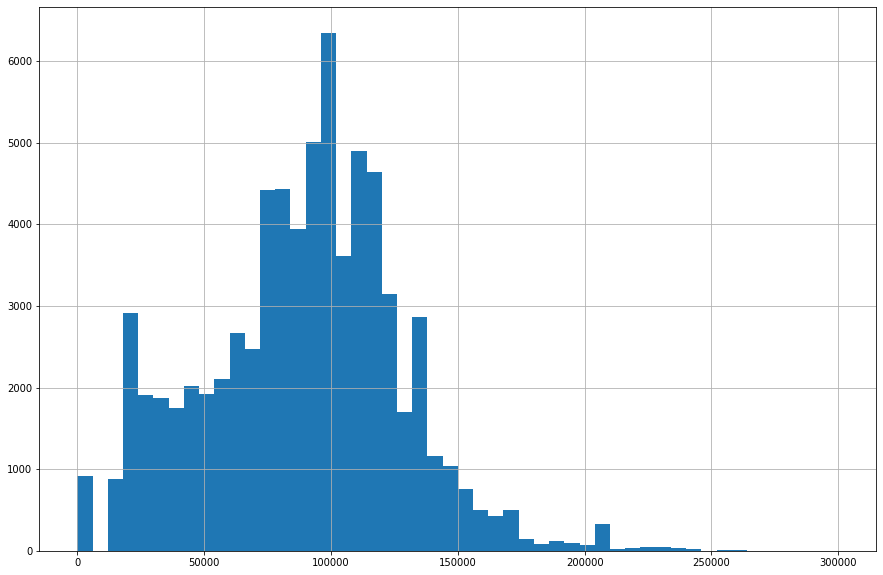

In [13]:
plt.figure(figsize = (15,10))
df['PW_WAGE'].hist(bins = 50, range = [0,300000])

In [51]:
#df_full = df.dropna()

#employed = list()

#for i in train_df['Number of years employed (0 to 10; 10 = 10 or more)']:
#    if i == '> 500000':
#        employed.append(1)
#    elif i == '9 years':
#        employed.append(1)
#    elif i == '8 years':
#        employed.append(1)
#    elif i == '7 years':
#        employed.append(1)
#    elif i == '6 years':
#        employed.append(1)
#    else:
#        employed.append(0)

#train_df['Employee Tenure > 5 years'] = employed
        
#sns.distplot(df_full['PW_WAGE'])

In [ ]:
plt.figure(figsize = (15,10))
#df['COUNTRY_OF_CITIZENSHIP'].hist()

In [75]:
column_info(df, 'SUNDAY_EDITION_NEWSPAPER')

Total Values: 71942
Total Non-NaaN Values: 70325
Total NaaN Values: 1617
% NaaN Values 0.022993245645218627
Y    70002
N      323
Name: SUNDAY_EDITION_NEWSPAPER, dtype: int64
Y    0.995407
N    0.004593
Name: SUNDAY_EDITION_NEWSPAPER, dtype: float64
